<style>
    .center-align {
        text-align: center;
    }
</style>

<div class="center-align">
    <h1>Decision Tree Algorithm (Classification)</h1>
</div>


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# droping unwanted features 
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['Sex']=encode.fit_transform(df['Sex'])

In [6]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,NaN,23.4500
889,1,1,1,26.0,30.0000


In [7]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [8]:
x,y

(     Pclass  Sex   Age     Fare
 0         3    1  22.0   7.2500
 1         1    0  38.0  71.2833
 2         3    0  26.0   7.9250
 3         1    0  35.0  53.1000
 4         3    1  35.0   8.0500
 ..      ...  ...   ...      ...
 886       2    1  27.0  13.0000
 887       1    0  19.0  30.0000
 888       3    0   NaN  23.4500
 889       1    1  26.0  30.0000
 890       3    1  32.0   7.7500
 
 [891 rows x 4 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [9]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [10]:
mean=x['Age'].mean()
x.fillna(mean,inplace=True)

In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model=tree.DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

[Text(0.3376289862414676, 0.98, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.16195605802047783, 0.94, 'x[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.05631399317406143, 0.9, 'x[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.03754266211604096, 0.86, 'x[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.030716723549488054, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04436860068259386, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07508532423208192, 0.86, 'x[3] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.05802047781569966, 0.82, 'x[3] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.051194539249146756, 0.78, 'x[2] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.03754266211604096, 0.74, 'x[2] <= 23.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61]'),
 Text(0.030716723549488054, 0.7, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),


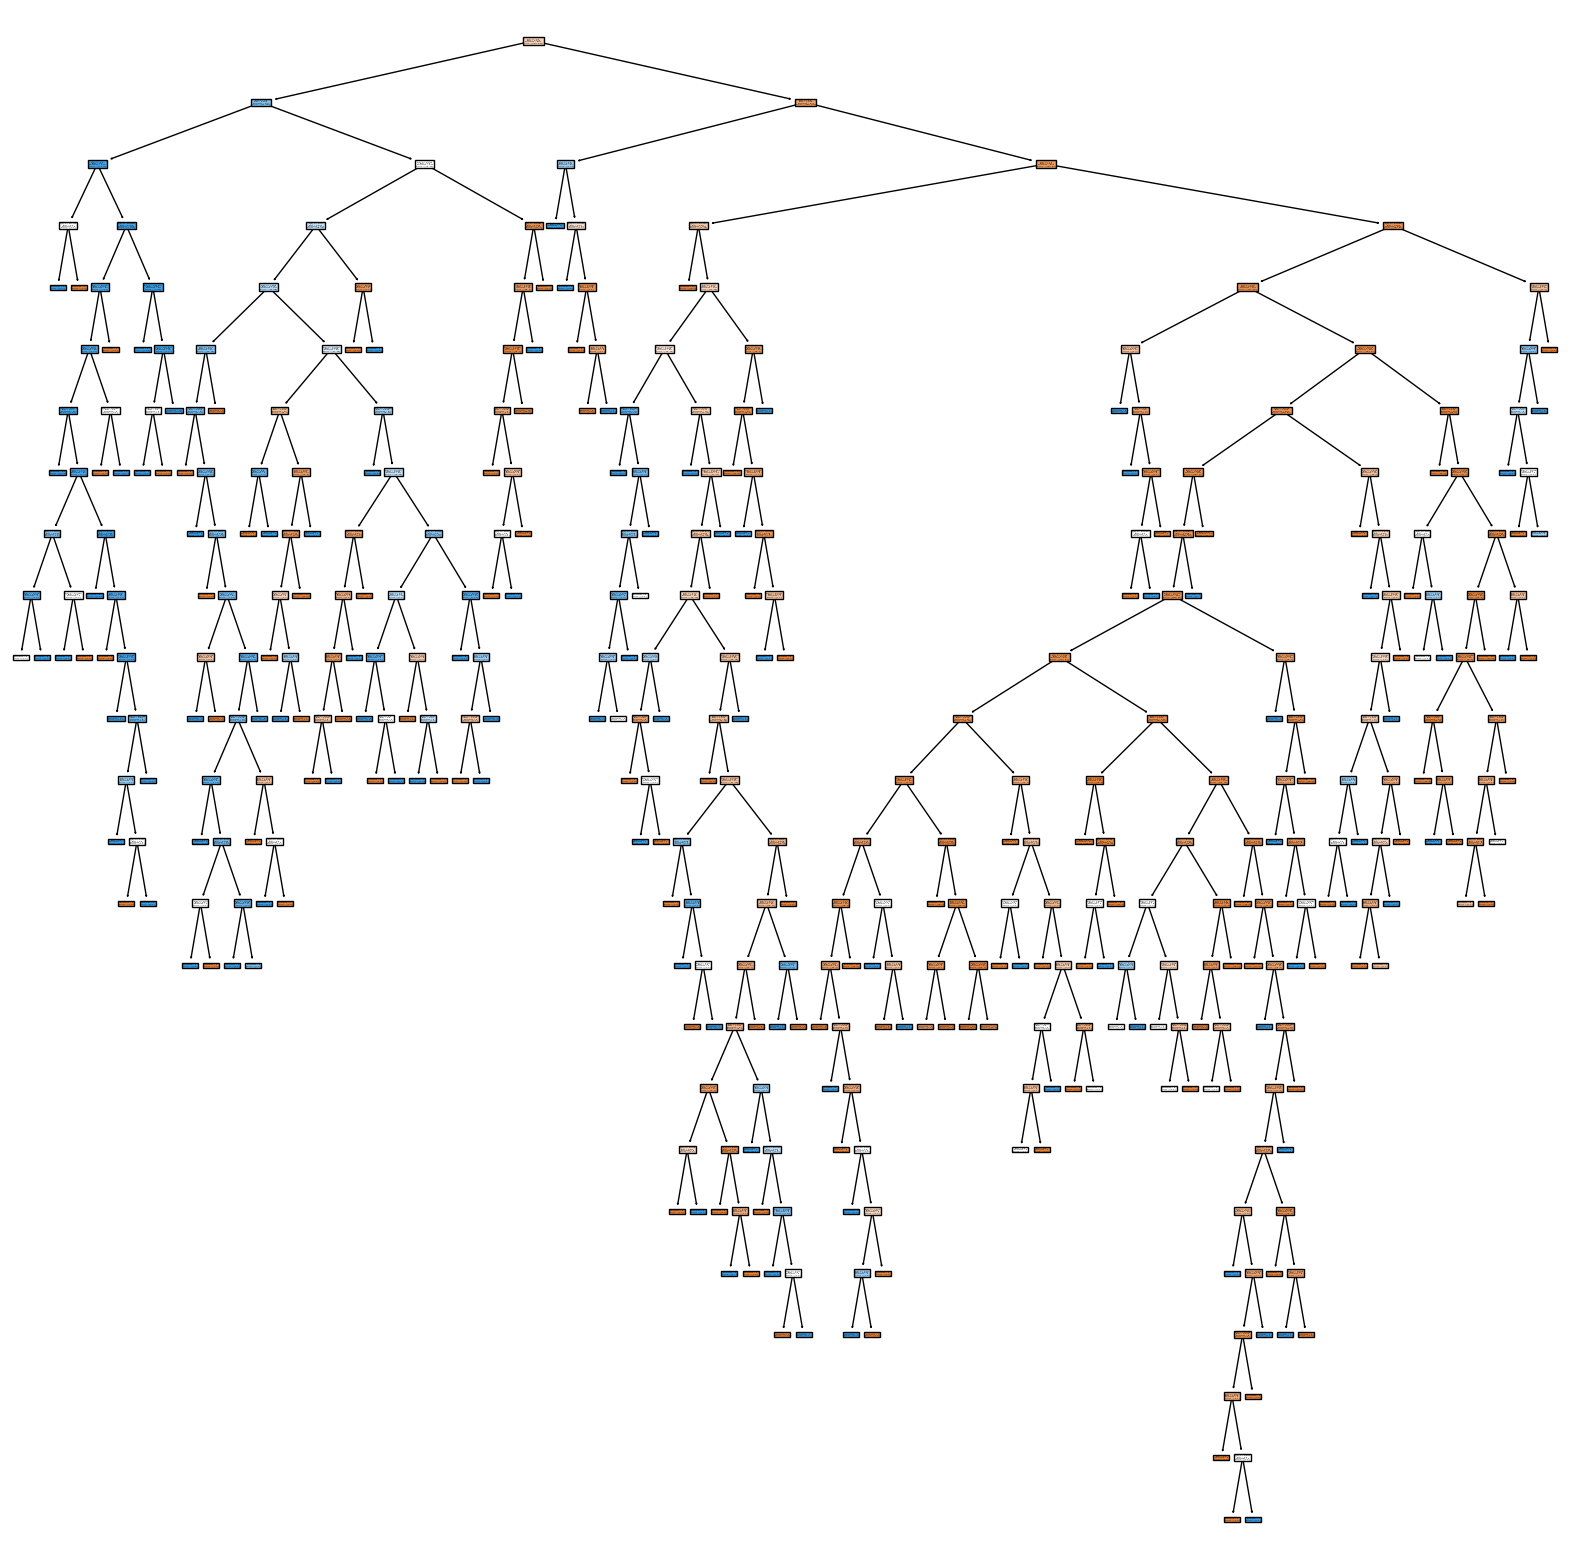

In [12]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True)

In [13]:
model.score(x,y)

0.9797979797979798

In [27]:
model.predict([[3,1,22.0,7.2500]])

array([0], dtype=int64)

This means that the passenger details like(Pclass=3,Sex=1,Age=22.0,Fare=7.2500) is not survived

In [28]:
model.predict([[1,0,38.0,71.2833]])

array([1], dtype=int64)

This means that the passenger details like(Pclass=1,Sex=0,Age=38.0,Fare=71.2833) is survived

In [30]:
!jupyter nbconvert --to webpdf --allow-chromium-download Decision_Tree_classification_2.ipynb


[NbConvertApp] Converting notebook Decision_Tree_classification_2.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 544840 bytes to Decision_Tree_classification_2.pdf
